In [3]:
import math
import pandas as pd
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from random import randint
from scipy.stats import kstest
from matplotlib import pyplot as plt
from scipy.stats import t
import seaborn as sns
import math
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm 


In [4]:
df = pd.read_csv('telco.csv', sep='	')

1. The lasso regression is an alternative approach to variable selection.

(a) Explain in your own words the idea of the lasso regression. Sketch a situation
when a simple linear regression fails, but the lasso regression still can be estimated.

**** Lasso performs a so called L1 regularization (a process of introducing additional information in order to prevent overfitting), i.e. adds penalty equivalent to absolute value of the magnitude of coefficients. In particular, the minimization objective does not only include the residual sum of squares (RSS) - like in the OLS regression setting - but also the sum of the absolute value of coefficients.
Lasso will help in case we have low quantity of observations but a lot of features

**** The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.
Lasso will help in case we have low quantity of observations but a lot of features.

(b) For the usual regression model the variables are rarely normalized/standardized.
However, in the case of the lasso regression the scaling becomes crucial. Why?
Scale your data by (x i − x̄)/σ̂ x . Can/should the binary variCan/should the binary variables be scaled in the
same fashion? How would you handle the variable ed?

**** Normalization is very important for methods with regularization. This is because the scale of the variables affect the how much regularization will be applies to specific variable. For example, suppose one variable is in a very large scale, say order of millions and another variable is from 0 to 1. Then, we can think the regularization will have little effect on first variable. As well as we do normalization, normalize it to 0 to 1 or standardize the features does not matter too much. 

**** The lasso method requires initial standardization of the regressors, so that the penalization scheme is fair to all regressors. For categorical regressors, one codes the regressor with dummy variables and then standardizes the dummy variables. As pointed out by a referee, however, the relative scaling between continuous and categorical variables in this scheme can be somewhat arbitrary.


Lasso regression puts constraints on the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable. It is therefore necessary to center and reduce, or standardize, the variables.The result of centering the variables means that there is no longer an intercept. 
https://stats.stackexchange.com/questions/86434/is-standardisation-before-lasso-really-necessary
****

Categorical variable add should be coded like a Dummy

(c) Run a lasso regression for data with α ∈ (0, 1). Plot the estimated parameters
as functions of α. Which value of α would you recommend? If it is easy to
implement, then determine the optimal λ by cross-validation.

https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/

In [149]:
df.columns

Index(['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ',
       'retire', 'gender', 'longmon', 'wiremon', 'churn'],
      dtype='object')

In [150]:
df.head(2)

,tenure,age,marital,address,income,ed,employ,retire,gender,longmon,wiremon,churn
1,13,44,Married,9,64,College degree,5,No,Male,3.7,0.0,Yes
2,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,4.4,35.7,Yes


In [151]:
df = pd.get_dummies(df, columns=['marital','ed', 'churn', 'retire', 'gender']).head()
df.fillna(0, inplace=True)

In [152]:
df = (df - df.mean())/df.std()
df.fillna(0, inplace = True)

In [153]:
X = df.drop(columns=['longmon', 'marital_Unmarried', 'ed_College degree','churn_No','retire_No','gender_Female'])
y = df['longmon'] 
X.head(2)


,tenure,age,address,income,employ,wiremon,marital_Married,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,churn_Yes,retire_Yes,gender_Male
1,-0.715810,0.602813,-0.468265,-0.244605,-0.27074,-0.447214,0.447214,-0.730297,-0.447214,-0.447214,0.0,0.730297,0.0,0.730297
2,-0.802052,-0.581284,-0.760930,1.247900,-0.27074,1.788854,0.447214,-0.730297,-0.447214,1.788854,0.0,0.730297,0.0,0.730297


In [154]:
# lasso = Lasso()
# lasso.fit(X_train,y_train)
# train_score=lasso.score(X_train,y_train)
# test_score=lasso.score(X_test,y_test)
# coeff_used = np.sum(lasso.coef_!=0)

In [155]:
reg = Lasso(alpha=0.5)
reg.fit(X, y)


Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


/home/ky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/home/ky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


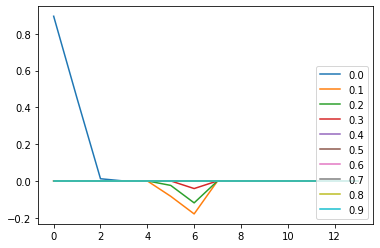

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
plt.clf()
result = pd.DataFrame()

for i in np.arange(0.0, 1.0, 0.1):
    print(i)
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)
    plt.plot(reg.coef_, label=round(i, 1))
    
plt.legend(loc="lower right")
    
plt.show()

As we see the most coefficients different from zero is at Alpha abt. 0.6. It seems the most optimal

/home/ky/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CV [ 0.9137916   0.          0.          0.01205257  0.          0.
 -0.          0.          0.          0.          0.         -0.
  0.         -0.02873007]


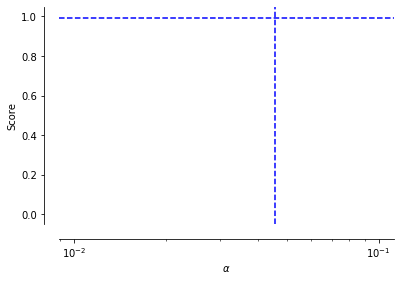

In [157]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
plt.clf()
alphas = np.logspace(0, 1, 0.1)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    print(a, lasso.coef_)
    
lassocv = linear_model.LassoCV()
lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)

plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

In [158]:
lassocv_alpha

0.04561843263884558

2. A nonlinear regression offers a flexible technique for modelling complex relationships.
We wish to explain the tenure by the long distance calls per month longmon.
(a) Make a bivariate scatter plot and estimate an appropriate linear (!) model. Add
the regression line to the plot.

In [159]:
df = pd.read_csv('telco.csv', sep='	')

<Figure size 432x288 with 0 Axes>

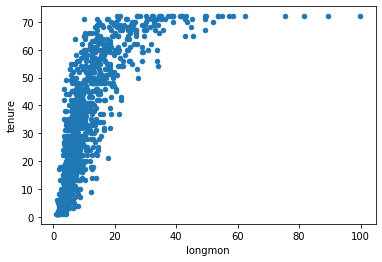

In [160]:
plt.clf()
df.plot(x='longmon', y='tenure', kind='scatter')
plt.show()

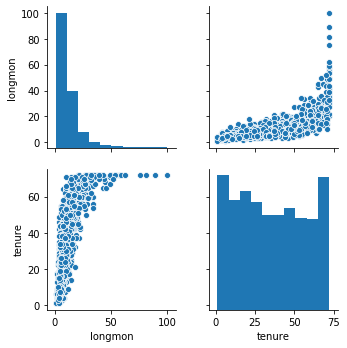

In [161]:
sns.pairplot(df[['longmon', 'tenure']])

Grahp see more like logarithm function, so appropriate linear model will be y = b0 + b1 * ln(xi) + ui

In [31]:
# df['longmon_exp'] = df['longmon'].apply(lambda x: 0 if x ==0 else math.exp(x))
# df['longmon_sq'] = df['longmon'].apply(lambda x: 0 if x ==0 else (x**(2)))

/home/ky/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


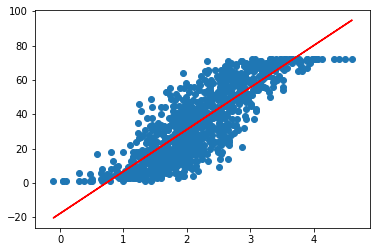

In [59]:
df['longmon_ln'] = df['longmon'].apply(lambda x: 0 if x ==0 else math.log(x))
X = df['longmon_ln'].astype(float)
Y = df['tenure']
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
# results.params
intercept, slope  = results.params
line = slope*X+intercept
plt.clf()
plt.plot(X, line, 'r', )
plt.scatter(X, Y)
plt.show()

[1.]


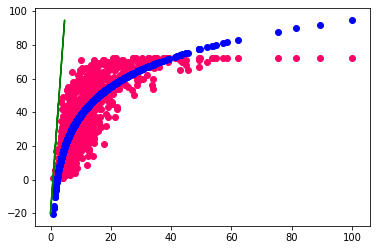

In [60]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pylab as plt

def func(power,b0,b1):
    return (b0  + b1 * np.log(x**power))

def residuals(power,b0,b1,PLP):
    return y - func(power,b0,b1)

N=1000
x= df['longmon']
y = df['tenure']
# x = pd.to_numeric(df['longmon'], errors='raise', downcast='float')
# y = pd.to_numeric(df['tenure'], errors='raise', downcast='float')
power_guess=0.1  # <-- You have to supply a guess for power
# b0 = np.linspace(-100,100,N)
# b1 = np.linspace(-100,100,N)
b0 = intercept
b1 = slope


power,cov,infodict,mesg,ier = optimize.leastsq(
    residuals,power_guess,args=(b0,b1,y),full_output=True)

y_fit=func(power,b0,b1)

print(power)

plt.scatter(x, y, color="#FF0067")
plt.scatter(x, y_fit, color="#0000FF")
plt.plot(X, line, 'g', )
plt.show()

(c) Explain in your own words, why all the classical tests and inferences are not
directly applicable to the NLS estimators.


If we have small number of observations per parametere, but large number of parameters, we will have large variances and as results unreliable tests 398

!!!!!!!!!!!!!!!!

(d) What kind of problems might arise if we decide to fit a non-linear regression using
all explanatory variables?

Because of high variances non linear model can become more bias.

3. Next we model the relationship between tenure and address using the nonparametric
Nadaraya-Watson regression.

!!!!!!
(a) An important calibration parameter of a nonparametric regression is the band-
width. Explain what happens with the regression/the weights in the Nadaraya-
Watson regression if the bandwidth is too high or too small.

If the bandwith is to small the density function wont be smooth, if too huge it wont represent the actual shape.
!!!!!!

(b) Fit a Nadaraya-Watson regression with Gaussian kernel and “optimal” bandwidth
to the longmon/address data. Check and explain how the “optimal bandwidth”
is determined in your software. Compare the (in-sample) fit of the nonparametric
regression and the nonlinear regression in the previous subproblem.


In [61]:
x = df['address']
y = df['tenure']

R2 0.27770519056147275


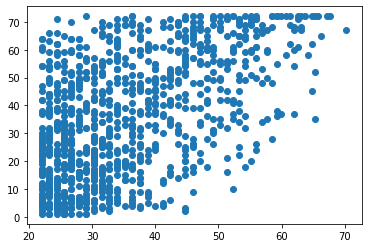

In [62]:
from statsmodels.nonparametric.kernel_regression import KernelReg
model = KernelReg(endog=y, exog= x, var_type='c')
results = model.fit()
plt.scatter(pd.Series(results[0]),y)
print("R2",model.r_squared())

By default method for bandwidth selection is ‘cv_ls’ (least-squares cross-validation)

In [77]:
# Nadaraya-Watson prediction
model.fit(x[21:22])[0]

array([42.41138129])

In [83]:
# Non-linear model predicion
func(b0,b1, x[999:1000])[1]

nan

From the graph above we see that Nadaraya Watson gave result much more seems to be true

4. Next we consider classification of the clients using the churn variable as the dependent
variable and the logistic regression.

(a) Fit a logistic regression to explain churn by the remaining explanatory variables.

In [92]:
df.head(1)

,tenure,age,marital,address,income,ed,employ,retire,gender,longmon,wiremon,churn,longmon_ln
1,13,44,Married,9,64,College degree,5,No,Male,3.7,0.0,Yes,1.308333


In [91]:
['marital', 'ed', 'retire', 'gender']

"['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'longmon', 'wiremon', 'churn', 'longmon_ln']"

In [112]:
# df.loc[:, df.columns != 'churn']
# data = df.drop(columns ='longmon_ln')

In [254]:
data = pd.read_csv('telco.csv', sep='	')
ed = data['ed'].unique()
cat_vars = ['churn', 'marital', 'ed', 'retire', 'gender']
for var in cat_vars:
    cat_list='var'+'_'+var
#     print(data[var])
    cat_list = pd.get_dummies(data[[var]], prefix=var)
    data1=data.join(cat_list)
    data=data1

cat_vars=['churn','marital', 'ed', 'retire', 'gender']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data = data[map(lambda x :x not in ['churn','marital', 'ed', 'retire', 'gender', 'marital_Unmarried', 'retire_No', 'gender_Female', 'churn_No'], list(data.columns))]
data.head(2)

,tenure,age,address,income,employ,longmon,wiremon,churn_Yes,marital_Married,ed_College degree,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male
1,13,44,9,64,5,3.7,0.0,1,1,1,0,0,0,0,0,1
2,11,33,7,136,5,4.4,35.7,1,1,0,0,0,1,0,0,1


In [258]:
str(data.columns.tolist())
ed = ['ed_College degree', 'ed_Did not complete high school', 'ed_High school degree', 'ed_Post-undergraduate degree', 'ed_Some college']

In [179]:
X = data.loc[:, data.columns != 'churn_Yes']
y = data.loc[:, data.columns == 'churn_Yes']

In [180]:
# Feature selection by RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/home/ky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [181]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                                Results: Logit
Model:                    Logit                  Pseudo R-squared:       inf   
Dependent Variable:       churn_Yes              AIC:                    inf   
Date:                     2020-01-27 22:43       BIC:                    inf   
No. Observations:         1000                   Log-Likelihood:         -inf  
Df Model:                 14                     LL-Null:                0.0000
Df Residuals:             985                    LLR p-value:            1.0000
Converged:                1.0000                 Scale:                  1.0000
No. Iterations:           7.0000                                               
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------

/home/ky/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/ky/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/ky/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/ky/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [231]:
# result.aic
feature_list = X.columns.tolist()
feature_list1 = feature_list

In [228]:
# aic = pd.DataFrame()
# for i in feature_list:
#     x = data[[i]]
#     logit_model=sm.Logit(y,x)
#     result=logit_model.fit()
# #     print(result.aic)
#     aic = aic.append({'feature': i, 'aic': result.aic}, ignore_index=True)
    

In [247]:
feature_list = X.columns.tolist()
stat = pd.DataFrame()
while len(feature_list) > 0:
    for i in range(len(feature_list)):
    #     print(i)
        if i == 0:
            x = data[[feature_list[i]]]
            logit_model=sm.Logit(y,x)
            result=logit_model.fit()
            aic0 = result.aic
            feature = feature_list[i]
        #     print(result.aic)
    #         aic1 = aic.append({'feature': i, 'aic': result.aic}, ignore_index=True)
        else:
            x = data[[feature_list[i]]]
            logit_model=sm.Logit(y,x)
            result=logit_model.fit()
        #     print(result.aic)
            aic = result.aic
            if aic0 < aic:
                pass
            else:
                aic0=aic
                feature = feature_list[i]

    stat = stat.append({'feature': feature, 'aic': result.aic}, ignore_index=True)
    feature_list.remove(feature)            
    

Optimization terminated successfully.
         Current function value: 262.359224
         Iterations 5
Optimization terminated successfully.
         Current function value: 210.052661
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 27.485924
         Iterations 4
Optimization terminated successfully.
         Current function value: 100.358793
         Iterations 5
Optimization terminated successfully.
         Current function value: 16.333369
         Iterations 4
Optimization terminated successfully.
         Current function value: 74.372953
         Iter

Optimization terminated successfully.
         Current function value: 89.251111
         Iterations 5
Optimization terminated successfully.
         Current function value: 262.359224
         Iterations 5
Optimization terminated successfully.
         Current function value: 210.052661
         Iterations 5
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 100.358793
         Iterations 5
Optimization terminated successfully.
         Current function value: 89.251111
         Iterations 5
Optimization terminated successfully.
         Current function value: 262.359224
         Ite

In [262]:
def naive_grouper(inputs, n):
    num_groups = len(inputs) // n
    return [tuple(inputs[i*n:(i+1)*n]) for i in range(num_groups)]

feature_list = X.columns.tolist()
feature_list = [i for i in feature_list if i not in ed]
feature_list.append(ed)

naive_grouper(feature_list, 2)

[('tenure', 'age'),
 ('address', 'income'),
 ('employ', 'longmon'),
 ('wiremon', 'marital_Married'),
 ('retire_Yes', 'gender_Male')]

[[['tenure'],
  ['age'],
  ['address'],
  ['income'],
  ['employ'],
  ['longmon'],
  ['wiremon'],
  ['marital_Married'],
  ['retire_Yes'],
  ['gender_Male'],
  [['ed_College degree',
    'ed_Did not complete high school',
    'ed_High school degree',
    'ed_Post-undergraduate degree',
    'ed_Some college']]],
 [['tenure', 'age'],
  ['tenure', 'address'],
  ['tenure', 'income'],
  ['tenure', 'employ'],
  ['tenure', 'longmon'],
  ['tenure', 'wiremon'],
  ['tenure', 'marital_Married'],
  ['tenure', 'retire_Yes'],
  ['tenure', 'gender_Male'],
  ['tenure',
   ['ed_College degree',
    'ed_Did not complete high school',
    'ed_High school degree',
    'ed_Post-undergraduate degree',
    'ed_Some college']],
  ['age', 'address'],
  ['age', 'income'],
  ['age', 'employ'],
  ['age', 'longmon'],
  ['age', 'wiremon'],
  ['age', 'marital_Married'],
  ['age', 'retire_Yes'],
  ['age', 'gender_Male'],
  ['age',
   ['ed_College degree',
    'ed_Did not complete high school',
    'ed_High school deg

In [357]:
# Unfortunatelly the is no stepwise model selection in python. So lets inmplement it's analogue

import re

# 1 Create all possible combinations of features. Dummies of categorical "Ed"  should be included all in the regresion 

feature_list = X.columns.tolist()
feature_list = [i for i in feature_list if i not in ed]
feature_list.append(ed)

feature_list1 = []
for i in range(len(feature_list)):
    feature_list1.append(list(map(list, itertools.combinations(feature_list, i))))
    
feature_list = feature_list1[1:]

def Flatten(xs):
    res = []
    def loop(ys):
        for i in ys:
            if isinstance(i, list):
                loop(i)
            else:
                res.append(i)
    loop(xs)
    return res

# 2 Run the logistic regression & select the combination that gives the smallest AIC

stat = pd.DataFrame()

for a in feature_list:
    for l in a:
        flatten = Flatten(l)
#         print(flatten)
        
        x = data[Flatten(l)]
        logit_model=sm.Logit(y,x)
        result=logit_model.fit()
        aic0 = result.aic
        feature = Flatten(l)
        print(result.aic)
#         aic1 = aic.append({'feature': i, 'aic': result.aic}, ignore_index=True)

        stat = stat.append({'feature': feature, 'aic': result.aic}, ignore_index=True)

    


Optimization terminated successfully.
         Current function value: 262.359224
         Iterations 5
524720.4470638989
Optimization terminated successfully.
         Current function value: 210.052661
         Iterations 5
420107.3213452916
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: 27.485924
         Iterations 4
54973.84820934314
Optimization terminated successfully.
         Current function value: 100.358793
         Iterations 5
200719.58625309402
Optimization terminated successfully.
         Current function value: 30.801002
         Iterations 7
61604

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Ite

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Ite

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterati

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
inf


In [368]:
# stat.loc[stat['aic'] == stat['aic'].min()]

6       5.497385e+04
8       6.160400e+04
9       1.785042e+05
58      1.872797e+05
7       2.007196e+05
            ...     
698              inf
697              inf
696              inf
709              inf
2045             inf
Name: aic, Length: 2046, dtype: float64

In [244]:
feature_list

[]

In [238]:
sm.Logit(y,x).fit().aic

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


inf

In [240]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [241]:
forward_selected(data)

TypeError: forward_selected() missing 1 required positional argument: 'response'